<a href="https://colab.research.google.com/github/vermanaman419-prog/starwars-game-data-analytics/blob/main/starwars_game_data_check_and_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Check And Transformation**

In [14]:
import pandas as pd

df = pd.read_csv("STARWARS_GAME_DATA.csv")

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   player_id                2000 non-null   int64 
 1   player_name              2000 non-null   object
 2   gender                   2000 non-null   object
 3   purchase_date            2000 non-null   object
 4   age                      2000 non-null   int64 
 5   gaming_console           2000 non-null   object
 6   total_interaction_hours  2000 non-null   int64 
 7   favorite_storyline       2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


,player_id,age,total_interaction_hours
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,30.669000,49.651500
std,577.494589,8.559852,28.872389
min,1.000000,16.000000,1.000000
25%,500.750000,23.000000,24.000000
50%,1000.500000,31.000000,49.000000
75%,1500.250000,38.000000,75.000000
max,2000.000000,45.000000,100.000000


In [15]:
df.head()

,player_id,player_name,gender,purchase_date,age,gaming_console,total_interaction_hours,favorite_storyline
0,1,Linda Smith,Female,2023-09-08,24,PlayStation 5,32,Dark Side Temptation
1,2,William White,Male,2024-07-12,37,PC,28,Jedi Resurrection
2,3,Michelle Wilson,Female,2023-04-06,16,PlayStation 5,71,Dark Side Temptation
3,4,Joseph Taylor,Male,2024-07-28,16,PlayStation 5,84,Droid Uprising
4,5,Andrew Wilson,Male,2024-08-26,30,Xbox Series X,80,Force Awakening


In [16]:
#checking missing Values
df.isnull().sum()


,0
player_id,0
player_name,0
gender,0
purchase_date,0
age,0
gaming_console,0
total_interaction_hours,0
favorite_storyline,0


In [17]:
#checking duplicates
df.duplicated().sum()


np.int64(0)

In [18]:
#checking negetive values
df['total_interaction_hours'].describe()


,total_interaction_hours
count,2000.000000
mean,49.651500
std,28.872389
min,1.000000
25%,24.000000
50%,49.000000
75%,75.000000
max,100.000000


In [19]:
df = df[df['total_interaction_hours'] >= 0]


# **Adding Features**

In [20]:
#Engagement Level
def engagement_level(hours):
    if hours < 30:
        return "Low"
    elif hours < 70:
        return "Medium"
    else:
        return "High"

df['engagement_level'] = df['total_interaction_hours'].apply(engagement_level)


In [21]:
#Age Group
def age_group(age):
    if age < 20:
        return "Teen"
    elif age < 35:
        return "Young Adult"
    else:
        return "Adult"

df['age_group'] = df['age'].apply(age_group)


In [22]:
df.head()

,player_id,player_name,gender,purchase_date,age,gaming_console,total_interaction_hours,favorite_storyline,engagement_level,age_group
0,1,Linda Smith,Female,2023-09-08,24,PlayStation 5,32,Dark Side Temptation,Medium,Young Adult
1,2,William White,Male,2024-07-12,37,PC,28,Jedi Resurrection,Low,Adult
2,3,Michelle Wilson,Female,2023-04-06,16,PlayStation 5,71,Dark Side Temptation,High,Teen
3,4,Joseph Taylor,Male,2024-07-28,16,PlayStation 5,84,Droid Uprising,High,Teen
4,5,Andrew Wilson,Male,2024-08-26,30,Xbox Series X,80,Force Awakening,High,Young Adult


# **Distribution Check**

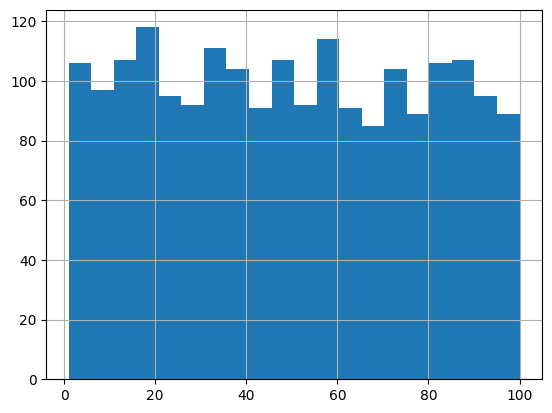

In [13]:
import matplotlib.pyplot as plt

df['total_interaction_hours'].hist(bins=20)
plt.show()


# Converting dataframe to CSV for Further Insights

In [23]:
df.to_csv('starwars_data_for_insights.csv', index=False)